In [2]:
import pandas as pd


In [59]:
a = {
    'country': ['Greece', 'Netherlands', 'Denmark'],
    'population': [10000000, 17000000, 6000000], 
}

In [60]:
df2 = pd.DataFrame(a)

In [65]:
df2

,country,population
0,Greece,10000000
1,Netherlands,17000000
2,Denmark,6000000


In [66]:
df2.to_excel('mitsos.xls')

In [67]:
!pwd

/Users/alexandroskanterakis/python_lessons


In [62]:
df2.to_dict('record')

[{'country': 'Greece', 'population': 10000000},
 {'country': 'Netherlands', 'population': 17000000},
 {'country': 'Denmark', 'population': 6000000}]

In [63]:
df2.to_dict('index')

{0: {'country': 'Greece', 'population': 10000000},
 1: {'country': 'Netherlands', 'population': 17000000},
 2: {'country': 'Denmark', 'population': 6000000}}

In [13]:
!ls game-of-thrones-deaths-data.csv

game-of-thrones-deaths-data.csv


In [74]:
df = pd.read_csv('game-of-thrones-deaths-data.csv')

In [76]:
df

,order,season,episode,character_killed,killer,method,method_cat,reason,location,allegiance,importance
0,1,1,1,Waymar Royce,White Walker,Ice sword,Blade,Unknown,Beyond the Wall,"House Royce, Night’s Watch",2.0
1,2,1,1,Gared,White Walker,Ice sword,Blade,Unknown,Beyond the Wall,Night’s Watch,2.0
2,3,1,1,Will,Ned Stark,Sword (Ice),Blade,Deserting the Night’s Watch,Winterfell,Night’s Watch,2.0
3,4,1,1,Stag,Direwolf,Direwolf teeth,Animal,Unknown,Winterfell,None,1.0
4,5,1,1,Direwolf,Stag,Antler,Animal,Unknown,Winterfell,None,1.0
5,6,1,1,Jon Arryn,Lysa Arryn,Poison,Poison,Petyr Baelish persuaded Lysa to do so for reas...,King’s Landing,House Arryn,2.0
6,7,1,1,Dothraki man,Dothraki man,Arakh,Blade,A Dothraki wedding without at least three deat...,Pentos,Dothraki,1.0
7,8,1,2,Catspaw assassin,Summer,Direwolf teeth,Animal,Attempting to kill Bran Stark,Winterfell,None,1.0
8,9,1,2,Mycah,Sandor “the Hound” Clegane,Unknown (likely a sword),Unknown,Joffrey has him killed after Arya attacks Joffrey,Kingsroad,Smallfolk,3.0
9,10,1,2,Lady,Ned Stark,Knife,Blade,Robert Baratheon orders that Lady be killed to...,Kingsroad,House Stark,3.0


In [82]:
(df['importance']>1).value_counts().to_dict()[True]

204

In [85]:
df[df['importance']>1].shape[0]

204

In [87]:
df[ (df['importance']>1) & (df['killer'] == 'Arya Stark') ].shape[0]

11

In [88]:
# Σε ποια σεζόν έχει σκοτώσει περισσότερους ο Jon Snow; Πάρτε μόνο όσους έχουν importance μεγαλύτερο από 1.

In [109]:
temp = df[(df['killer'] == 'Jon Snow') & (df['importance']>1) ].groupby('season')['order'].count()

In [126]:
list(temp[temp == temp.max()].to_dict().keys())[0]

6

In [127]:
temp[temp == temp.max()]

season
6    4
Name: order, dtype: int64

In [130]:
df['method_cat'].unique().size

16

In [143]:
# Για κάθε διαφορετική κατηγορία θανάτου, σε ποιά φατρία/οικογένεια/φυλή ανοίκουν τα μέλη 
# που έχουν σκοτωθεί τις περισσότερες φορές από αυτή τη κατηγορία; 
# vΠάρτε μόνο θανάτους με importance>1

df[df['importance']>1].groupby(['method_cat', 'allegiance']).count().sort_values("order").groupby(level=0).tail(1)

,,order,season,episode,character_killed,killer,method,reason,location,importance
method_cat,allegiance,,,,,,,,,
Magic,Dothraki,1,1,1,1,1,1,1,1,1
Household item,Dothraki,1,1,1,1,1,1,1,1,1
Falling,House Greyjoy,1,1,1,1,1,1,1,1,1
Bludgeon,House Lannister,1,1,1,1,1,1,1,1,1
Unknown,"Dothraki, House Targaryen",2,2,2,2,2,2,2,2,2
Polearm,None,2,2,2,2,2,2,2,2,2
Hands,House Lannister,2,2,2,2,2,2,2,2,2
Axe,Brotherhood Without Banners,2,2,2,2,2,2,2,2,2
Crushing,House Lannister,2,2,2,2,2,2,2,2,2


In [161]:
df[df['importance']>1].groupby(['method_cat', 'allegiance']).count().sort_values("order", 
            ascending=False).groupby(level=0).head(1)

,,order,season,episode,character_killed,killer,method,reason,location,importance
method_cat,allegiance,,,,,,,,,
Blade,House Stark,11,11,11,11,11,11,11,11,11
Animal,Smallfolk,4,4,4,4,4,4,4,4,4
Other,Night’s Watch,4,4,4,4,4,4,4,4,4
Arrow,Free Folk,3,3,3,3,3,3,3,3,3
Fire/Burning,Dothraki,3,3,3,3,3,3,3,3,3
Crushing,House Lannister,2,2,2,2,2,2,2,2,2
Hands,House Lannister,2,2,2,2,2,2,2,2,2
Poison,"House Baratheon of King’s Landing, House Lannister",2,2,2,2,2,2,2,2,2
Polearm,None,2,2,2,2,2,2,2,2,2


In [162]:
# Ποιος έχει κάνει τους 2ους περισσότερους φόνους με importance>1;

In [168]:
df[df['importance']>1]['killer'].value_counts()[1:2]

Arya Stark    11
Name: killer, dtype: int64

In [169]:
# Ποιος είναι ο λόγος (reason) που προκάλεσε τους περισσότερους θανάτους με importance>2;

In [175]:
df[df['importance']>2]['reason'].value_counts()[:1]

Killed in a coup by Cersei to remove all of her enemies    6
Name: reason, dtype: int64

In [194]:
# Πόσος είναι ο μέσος όρος θανάτων ανά επεισόδια για κάθε σεζόν; Δηλαδή 
# για κάθε σεζόν (8 συνολικά), τυπώστε τον μέσο όρο από 
# θανάτους που είχε το κάθε επεισόδιο αυτής της σεζόν.

df.groupby('season')['episode'].aggregate(['sum', 'count', 'mean'])

,sum,count,mean
season,,,
1,348,59,5.898305
2,970,130,7.461538
3,646,87,7.425287
4,1395,181,7.707182
5,1777,246,7.223577
6,4494,540,8.322222
7,5876,1096,5.361314
8,15674,4548,3.446350


In [207]:
df.groupby('season')['episode'].aggregate(['count', 'sum'])

,count,sum
season,,
1,59,348
2,130,970
3,87,646
4,181,1395
5,246,1777
6,540,4494
7,1096,5876
8,4548,15674


In [226]:
(7+3+1+17+5+5+11+7+3)/9

6.555555555555555

In [224]:
df.groupby(['season', 'episode'], as_index=False).aggregate('count').groupby('season')['order'].mean()

season
1      6.555556
2     14.444444
3      9.666667
4     18.100000
5     24.600000
6     54.000000
7    156.571429
8    909.600000
Name: order, dtype: float64

In [206]:
df.groupby(['season', 'episode']).aggregate('count')

order  character_killed  killer  method  method_cat  reason  \
season episode                                                                
1      1            7                 7       7       7           7       7   
       2            3                 3       3       3           3       3   
       4            1                 1       1       1           1       1   
       5           17                17      17      17          17      17   
       6            5                 5       5       5           5       5   
       7            5                 5       5       5           5       5   
       8           11                11      11      11          11      11   
       9            7                 7       7       7           7       7   
       10           3                 3       3       3           3       3   
2      1            7                 7       7       7           7       7   
       2            1                 1       1       1           1       1   
       3            8                 8       8       8           8       8   
       4            3                 3       3       3           3       3   
       5            4                 4       4       4           4       4   
       6           12                12      12      12          12      12   
       7           15                15      15      15          15      15   
       9           72                72      72      72          72      72   
       10           8                 8       8       8           8       8   
3      1            2                 2       2       2           2       2   
       2            1                 1       1       1           1       1   
       3            4                 4       4       4           4       4   
       4           10                10      10      10          10      10   
       5            5                 5       5       5           5       5   
       6            7                 7       7       7           7       7   
       8            6                 6       6       6           6       6   
       9           45                45      45      45          45      45   
       10           7                 7       7       7           7       7   
4      1            5                 5       5       5           5       5   
       2            6                 6       6       6           6       6   
       3           11                11      11      11          11      11   
...               ...               ...     ...     ...         ...     ...   
5      3            3                 3       3       3           3       3   
       4           49                49      49      49          49      49   
       5            2                 2       2       2           2       2   
       6            1                 1       1       1           1       1   
       7            5                 5       5       5           5       5   
       8          100               100     100     100         100     100   
       9           65                65      65      65          65      65   
       10          12                12      12      12          12      12   
6      1            9                 9       9       9           9       9   
       2            7                 7       7       7           7       7   
       3           11                11      11      11          11      11   
       4           18                18      18      18          18      18   
       5           63                63      63      63          63      63   
       6            9                 9       9       9           9       9   
       7            1                 1       1       1           1       1   
       8           11                11      11      11          11      11   
       9          208               208     208     208         208     208   
       10         203               203     203     203         20

In [187]:
#(7+1+8+3+4+12+15+72+8)/10
df.groupby(['season', 'episode']).aggregate('count')

13.0

In [ ]:
temp

In [19]:
df[['importance', 'reason']]

,importance,reason
0,2.0,Unknown
1,2.0,Unknown
2,2.0,Deserting the Night’s Watch
3,1.0,Unknown
4,1.0,Unknown
5,2.0,Petyr Baelish persuaded Lysa to do so for reas...
6,1.0,A Dothraki wedding without at least three deat...
7,1.0,Attempting to kill Bran Stark
8,3.0,Joffrey has him killed after Arya attacks Joffrey
9,3.0,Robert Baratheon orders that Lady be killed to...


In [20]:
df['importance'] > 2

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8        True
9        True
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27       True
28      False
29      False
        ...  
6857     True
6858    False
6859    False
6860    False
6861    False
6862    False
6863    False
6864     True
6865    False
6866    False
6867    False
6868     True
6869     True
6870    False
6871    False
6872    False
6873    False
6874    False
6875    False
6876    False
6877    False
6878    False
6879    False
6880    False
6881    False
6882    False
6883     True
6884     True
6885    False
6886     True
Name: importance, Length: 6887, dtype: bool

In [21]:
df[df['importance'] > 2]

,order,season,episode,character_killed,killer,method,method_cat,reason,location,allegiance,importance
8,9,1,2,Mycah,Sandor “the Hound” Clegane,Unknown (likely a sword),Unknown,Joffrey has him killed after Arya attacks Joffrey,Kingsroad,Smallfolk,3.0
9,10,1,2,Lady,Ned Stark,Knife,Blade,Robert Baratheon orders that Lady be killed to...,Kingsroad,House Stark,3.0
27,28,1,5,Jory Cassel,Jaime Lannister,Knife,Blade,Attacked Jaime in defense of Ned Stark,King’s Landing,House Stark,3.0
32,33,1,6,Viserys Targaryen,Khal Drogo,Molten gold,Fire/Burning,Threatened Daenerys Targaryen and her unborn c...,Vaes Dothrak,House Targaryen,4.0
33,34,1,7,Robert Baratheon,Boar,Tusk,Animal,Hunted the boar while drunk,King’s Landing,House Baratheon of King’s Landing,4.0
43,44,1,8,Septa Mordane,Lannister soldier,Sword,Blade,Cersei Lannister and Joffrey Baratheon attacke...,King’s Landing,House Stark,3.0
44,45,1,8,Syrio Forel,Meryn Trant,Sword,Blade,Cersei Lannister and Joffrey Baratheon attacke...,King’s Landing,House Stark,3.0
55,56,1,9,Ned Stark,Ilyn Payne,Sword (Ice),Blade,Executed on Joffrey Baratheon’s orders after N...,King’s Landing,House Stark,4.0
57,58,1,10,Khal Drogo,Daenerys Targaryen,Pillow,Household item,Killed after being put into a vegetative state...,Red Waste,Dothraki,4.0
58,59,1,10,Mirri Maz Duur,Daenerys Targaryen,Fire,Fire/Burning,Revenge for her having killed Khal Drogo and R...,Red Waste,None,3.0


In [23]:
df[df['importance'] > 2].shape

(119, 11)

In [29]:
df[(df['importance'] > 2) & (df['season']<3)]

,order,season,episode,character_killed,killer,method,method_cat,reason,location,allegiance,importance
8,9,1,2,Mycah,Sandor “the Hound” Clegane,Unknown (likely a sword),Unknown,Joffrey has him killed after Arya attacks Joffrey,Kingsroad,Smallfolk,3.0
9,10,1,2,Lady,Ned Stark,Knife,Blade,Robert Baratheon orders that Lady be killed to...,Kingsroad,House Stark,3.0
27,28,1,5,Jory Cassel,Jaime Lannister,Knife,Blade,Attacked Jaime in defense of Ned Stark,King’s Landing,House Stark,3.0
32,33,1,6,Viserys Targaryen,Khal Drogo,Molten gold,Fire/Burning,Threatened Daenerys Targaryen and her unborn c...,Vaes Dothrak,House Targaryen,4.0
33,34,1,7,Robert Baratheon,Boar,Tusk,Animal,Hunted the boar while drunk,King’s Landing,House Baratheon of King’s Landing,4.0
43,44,1,8,Septa Mordane,Lannister soldier,Sword,Blade,Cersei Lannister and Joffrey Baratheon attacke...,King’s Landing,House Stark,3.0
44,45,1,8,Syrio Forel,Meryn Trant,Sword,Blade,Cersei Lannister and Joffrey Baratheon attacke...,King’s Landing,House Stark,3.0
55,56,1,9,Ned Stark,Ilyn Payne,Sword (Ice),Blade,Executed on Joffrey Baratheon’s orders after N...,King’s Landing,House Stark,4.0
57,58,1,10,Khal Drogo,Daenerys Targaryen,Pillow,Household item,Killed after being put into a vegetative state...,Red Waste,Dothraki,4.0
58,59,1,10,Mirri Maz Duur,Daenerys Targaryen,Fire,Fire/Burning,Revenge for her having killed Khal Drogo and R...,Red Waste,None,3.0


In [33]:
df['imp2'] = df['importance'].apply(lambda x : x+1)

In [35]:
df

,order,season,episode,character_killed,killer,method,method_cat,reason,location,allegiance,importance,imp2
0,1,1,1,Waymar Royce,White Walker,Ice sword,Blade,Unknown,Beyond the Wall,"House Royce, Night’s Watch",2.0,3.0
1,2,1,1,Gared,White Walker,Ice sword,Blade,Unknown,Beyond the Wall,Night’s Watch,2.0,3.0
2,3,1,1,Will,Ned Stark,Sword (Ice),Blade,Deserting the Night’s Watch,Winterfell,Night’s Watch,2.0,3.0
3,4,1,1,Stag,Direwolf,Direwolf teeth,Animal,Unknown,Winterfell,None,1.0,2.0
4,5,1,1,Direwolf,Stag,Antler,Animal,Unknown,Winterfell,None,1.0,2.0
5,6,1,1,Jon Arryn,Lysa Arryn,Poison,Poison,Petyr Baelish persuaded Lysa to do so for reas...,King’s Landing,House Arryn,2.0,3.0
6,7,1,1,Dothraki man,Dothraki man,Arakh,Blade,A Dothraki wedding without at least three deat...,Pentos,Dothraki,1.0,2.0
7,8,1,2,Catspaw assassin,Summer,Direwolf teeth,Animal,Attempting to kill Bran Stark,Winterfell,None,1.0,2.0
8,9,1,2,Mycah,Sandor “the Hound” Clegane,Unknown (likely a sword),Unknown,Joffrey has him killed after Arya attacks Joffrey,Kingsroad,Smallfolk,3.0,4.0
9,10,1,2,Lady,Ned Stark,Knife,Blade,Robert Baratheon orders that Lady be killed to...,Kingsroad,House Stark,3.0,4.0


In [42]:
df['ep_id'] = df.apply(lambda x: x['season']*100 + x['episode'], axis=1)

In [48]:
df[-1:]

,order,season,episode,character_killed,killer,method,method_cat,reason,location,allegiance,importance,imp2,ep_id
6886,6887,8,6,Daenerys Targaryen,Jon Snow,Knife,Blade,Stabbed in the stomach by Jon Snow after she “...,King’s Landing,House Targaryen,4.0,5.0,806


In [52]:
list(df.columns.values)

['order',
 'season',
 'episode',
 'character_killed',
 'killer',
 'method',
 'method_cat',
 'reason',
 'location',
 'allegiance',
 'importance',
 'imp2',
 'ep_id']

In [54]:
df[1234:1236]

,order,season,episode,character_killed,killer,method,method_cat,reason,location,allegiance,importance,imp2,ep_id
1234,1235,6,10,Peasant,Cersei Lannister,Wildfire,Fire/Burning,Killed in a coup by Cersei to remove all of he...,King’s Landing,Smallfolk,1.0,2.0,610
1235,1236,6,10,Peasant,Cersei Lannister,Wildfire,Fire/Burning,Killed in a coup by Cersei to remove all of he...,King’s Landing,Smallfolk,1.0,2.0,610


In [68]:
df[1234:1236].to_dict('record')

[{'order': 1235,
  'season': 6,
  'episode': 10,
  'character_killed': 'Peasant',
  'killer': 'Cersei Lannister',
  'method': 'Wildfire',
  'method_cat': 'Fire/Burning',
  'reason': 'Killed in a coup by Cersei to remove all of her enemies',
  'location': 'King’s Landing',
  'allegiance': 'Smallfolk',
  'importance': 1.0,
  'imp2': 2.0,
  'ep_id': 610},
 {'order': 1236,
  'season': 6,
  'episode': 10,
  'character_killed': 'Peasant',
  'killer': 'Cersei Lannister',
  'method': 'Wildfire',
  'method_cat': 'Fire/Burning',
  'reason': 'Killed in a coup by Cersei to remove all of her enemies',
  'location': 'King’s Landing',
  'allegiance': 'Smallfolk',
  'importance': 1.0,
  'imp2': 2.0,
  'ep_id': 610}]

In [73]:
df[4:5]['method'].values[0]

'Antler'

In [78]:
len(df['character_killed'].unique())

291

In [81]:
df['character_killed'].value_counts()

Wight                                  2901
Horse                                   755
Dothraki rider                          743
Golden Company soldier                  567
Lannister soldier                       290
Peasant                                 209
King’s Landing nobility                 166
Stark soldier                           160
Greyjoy (Euron-aligned) soldier         111
Wildling                                109
Bolton soldier                           86
Unsullied                                80
Son of the Harpy                         71
Baratheon of Dragonstone soldier         59
Frey soldier                             52
Night’s Watch brother                    35
Yunkai soldier                           28
Meereen citizen                          25
Greyjoy (Yara-aligned) soldier           21
Baratheon of King’s Landing soldier      18
Faith Militant brother                   16
Wildling/Night’s Watch brother           13
White Walker                    

In [86]:
df[df['location'].str.contains('Wall')]['location'].value_counts()

Beyond the Wall    993
The Wall            31
Name: location, dtype: int64

In [89]:
df[df['location'].str.contains('Wall', case=False)]['location'].value_counts()

Beyond the Wall    993
The Wall            31
Name: location, dtype: int64

In [90]:
import matplotlib.pyplot as plt

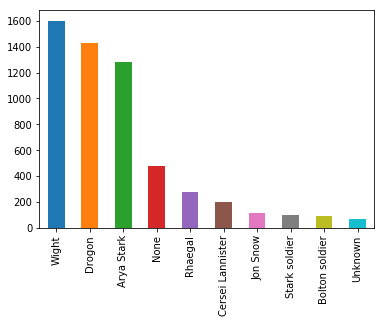

In [8]:
df['killer'].value_counts()[:10].plot(kind='bar')

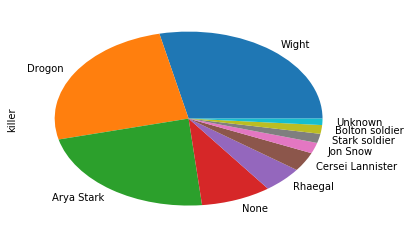

In [11]:
df['killer'].value_counts()[:10].plot(kind='pie')

In [14]:
df.sort_values('method')

,order,season,episode,character_killed,killer,method,method_cat,reason,location,allegiance,importance
4,5,1,1,Direwolf,Stag,Antler,Animal,Unknown,Winterfell,None,1.0
6299,6300,8,5,Lannister soldier,Dothraki rider,Arakh,Blade,Killed when Daenerys Targaryen attacked King’s...,King’s Landing,House Lannister,1.0
6291,6292,8,5,Lannister soldier,Dothraki rider,Arakh,Blade,Killed when Daenerys Targaryen attacked King’s...,King’s Landing,House Lannister,1.0
6290,6291,8,5,Lannister soldier,Dothraki rider,Arakh,Blade,Killed when Daenerys Targaryen attacked King’s...,King’s Landing,House Lannister,1.0
6289,6290,8,5,Lannister soldier,Dothraki rider,Arakh,Blade,Killed when Daenerys Targaryen attacked King’s...,King’s Landing,House Lannister,1.0
6288,6289,8,5,Lannister soldier,Dothraki rider,Arakh,Blade,Killed when Daenerys Targaryen attacked King’s...,King’s Landing,House Lannister,1.0
465,466,5,2,Mossador,Daario Naharis,Arakh,Blade,Executed for killing a Son of the Harpy agains...,Meereen,House Targaryen,3.0
6287,6288,8,5,Lannister soldier,Dothraki rider,Arakh,Blade,Killed when Daenerys Targaryen attacked King’s...,King’s Landing,House Lannister,1.0
850,851,6,9,Son of the Harpy,Daario Naharis,Arakh,Blade,Killed during attack on Meereen by slave trade...,Meereen,"Sons of the Harpy, Great Masters",1.0
235,236,3,9,Yunkai soldier,Daario Naharis,Arakh,Blade,Killed during sacking of Yunkai,Yunkai,Wise Masters,1.0


In [15]:
df.sort_values(['method', 'episode'])

,order,season,episode,character_killed,killer,method,method_cat,reason,location,allegiance,importance
4,5,1,1,Direwolf,Stag,Antler,Animal,Unknown,Winterfell,None,1.0
6,7,1,1,Dothraki man,Dothraki man,Arakh,Blade,A Dothraki wedding without at least three deat...,Pentos,Dothraki,1.0
465,466,5,2,Mossador,Daario Naharis,Arakh,Blade,Executed for killing a Son of the Harpy agains...,Meereen,House Targaryen,3.0
297,298,4,3,Champion of Meereen,Daario Naharis,Arakh,Blade,Killed representing Meereen as its champion,Meereen,Great Masters,2.0
1378,1379,7,4,Lannister soldier,Dothraki rider,Arakh,Blade,Killed when Daenerys Targaryen and her Dothrak...,Goldroad,House Lannister,1.0
1379,1380,7,4,Lannister soldier,Dothraki rider,Arakh,Blade,Killed when Daenerys Targaryen and her Dothrak...,Goldroad,House Lannister,1.0
1382,1383,7,4,Lannister soldier,Dothraki rider,Arakh,Blade,Killed when Daenerys Targaryen and her Dothrak...,Goldroad,House Lannister,1.0
1383,1384,7,4,Lannister soldier,Dothraki rider,Arakh,Blade,Killed when Daenerys Targaryen and her Dothrak...,Goldroad,House Lannister,1.0
1384,1385,7,4,Lannister soldier,Dothraki rider,Arakh,Blade,Killed when Daenerys Targaryen and her Dothrak...,Goldroad,House Lannister,1.0
1385,1386,7,4,Lannister soldier,Dothraki rider,Arakh,Blade,Killed when Daenerys Targaryen and her Dothrak...,Goldroad,House Lannister,1.0


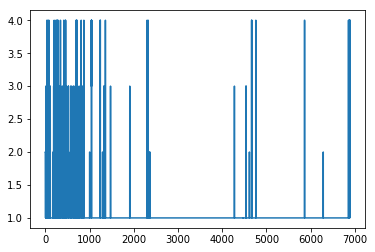

In [17]:
df['importance'].plot()

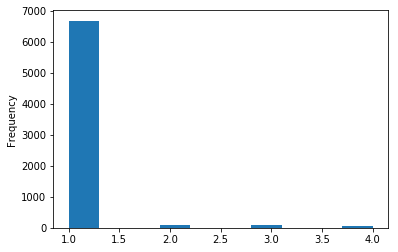

In [19]:
df['importance'].plot(kind='hist')

In [24]:
df

,order,season,episode,character_killed,killer,method,method_cat,reason,location,allegiance,importance
0,1,1,1,Waymar Royce,White Walker,Ice sword,Blade,Unknown,Beyond the Wall,"House Royce, Night’s Watch",2.0
1,2,1,1,Gared,White Walker,Ice sword,Blade,Unknown,Beyond the Wall,Night’s Watch,2.0
2,3,1,1,Will,Ned Stark,Sword (Ice),Blade,Deserting the Night’s Watch,Winterfell,Night’s Watch,2.0
3,4,1,1,Stag,Direwolf,Direwolf teeth,Animal,Unknown,Winterfell,None,1.0
4,5,1,1,Direwolf,Stag,Antler,Animal,Unknown,Winterfell,None,1.0
5,6,1,1,Jon Arryn,Lysa Arryn,Poison,Poison,Petyr Baelish persuaded Lysa to do so for reas...,King’s Landing,House Arryn,2.0
6,7,1,1,Dothraki man,Dothraki man,Arakh,Blade,A Dothraki wedding without at least three deat...,Pentos,Dothraki,1.0
7,8,1,2,Catspaw assassin,Summer,Direwolf teeth,Animal,Attempting to kill Bran Stark,Winterfell,None,1.0
8,9,1,2,Mycah,Sandor “the Hound” Clegane,Unknown (likely a sword),Unknown,Joffrey has him killed after Arya attacks Joffrey,Kingsroad,Smallfolk,3.0
9,10,1,2,Lady,Ned Stark,Knife,Blade,Robert Baratheon orders that Lady be killed to...,Kingsroad,House Stark,3.0


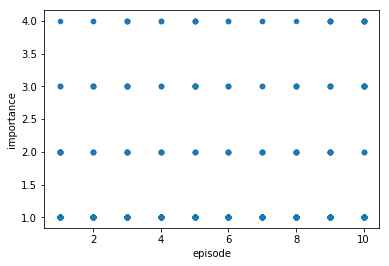

In [28]:
df.plot.scatter(x='episode', y='importance')

In [30]:
df

,order,season,episode,character_killed,killer,method,method_cat,reason,location,allegiance,importance
0,1,1,1,Waymar Royce,White Walker,Ice sword,Blade,Unknown,Beyond the Wall,"House Royce, Night’s Watch",2.0
1,2,1,1,Gared,White Walker,Ice sword,Blade,Unknown,Beyond the Wall,Night’s Watch,2.0
2,3,1,1,Will,Ned Stark,Sword (Ice),Blade,Deserting the Night’s Watch,Winterfell,Night’s Watch,2.0
3,4,1,1,Stag,Direwolf,Direwolf teeth,Animal,Unknown,Winterfell,None,1.0
4,5,1,1,Direwolf,Stag,Antler,Animal,Unknown,Winterfell,None,1.0
5,6,1,1,Jon Arryn,Lysa Arryn,Poison,Poison,Petyr Baelish persuaded Lysa to do so for reas...,King’s Landing,House Arryn,2.0
6,7,1,1,Dothraki man,Dothraki man,Arakh,Blade,A Dothraki wedding without at least three deat...,Pentos,Dothraki,1.0
7,8,1,2,Catspaw assassin,Summer,Direwolf teeth,Animal,Attempting to kill Bran Stark,Winterfell,None,1.0
8,9,1,2,Mycah,Sandor “the Hound” Clegane,Unknown (likely a sword),Unknown,Joffrey has him killed after Arya attacks Joffrey,Kingsroad,Smallfolk,3.0
9,10,1,2,Lady,Ned Stark,Knife,Blade,Robert Baratheon orders that Lady be killed to...,Kingsroad,House Stark,3.0


In [37]:
df.groupby('killer').count()

,order,season,episode,character_killed,method,method_cat,reason,location,allegiance,importance
killer,,,,,,,,,,
Accident,1,1,1,1,1,1,1,1,1,1
Allister Thorne,3,3,3,3,3,3,3,3,3,3
Amory Lorch,1,1,1,1,1,1,1,1,1,1
Arryn soldier,12,12,12,12,12,12,12,12,12,12
Arthur Dayne,3,3,3,3,3,3,3,3,3,3
Arya Stark,1278,1278,1278,1278,1278,1278,1278,1278,1278,1278
Baelish soldier,1,1,1,1,1,1,1,1,1,1
Baratheon of Dragonstone soldier,24,24,24,24,24,24,24,24,24,24
Baratheon of King’s Landing soldier,32,32,32,32,32,32,32,32,32,32


In [39]:
df.groupby('killer').max()

,order,season,episode,character_killed,method,method_cat,reason,location,allegiance,importance
killer,,,,,,,,,,
Accident,121,2,9,Baratheon of Dragonstone soldier,Blunt object,Bludgeon,Killed during the Battle of the Blackwater,King’s Landing,House Baratheon of Dragonstone,1.0
Allister Thorne,387,4,9,Wildling,Sword,Blade,Killed during the Battle of Castle Black,Castle Black,"Thenn, Free Folk",1.0
Amory Lorch,73,2,3,Yoren,Sword,Blade,Refused to hand over Gendry,Riverlands,Night’s Watch,3.0
Arryn soldier,1014,6,9,Bolton soldier,Spear,Polearm,Killed during the Battle of the Bastards,Winterfell,House Bolton,1.0
Arthur Dayne,724,6,3,Stark soldier,Sword,Blade,Killed when Ned Stark tried to rescue Lyanna f...,Tower of Joy,House Stark,1.0
Arya Stark,5860,8,10,Wight,Valyrian steel dagger,Unknown,Tried to kill Arya after she refused to assass...,Winterfell,Smallfolk,4.0
Baelish soldier,288,4,3,Dontos Hollard,Arrow,Arrow,To prevent Dontos from talking about Sansa Sta...,King’s Landing,House Hollard,3.0
Baratheon of Dragonstone soldier,441,4,10,Wildling,Sword,Polearm,Killed in Stannis Baratheon’s attack on the wi...,King’s Landing,House Baratheon of King’s Landing,1.0
Baratheon of King’s Landing soldier,181,2,9,Baratheon of Dragonstone soldier,Unknown,Unknown,Killed during the Battle of the Blackwater,King’s Landing,House Baratheon of Dragonstone,1.0


In [54]:
df3 = df.groupby('killer').mean()

In [57]:
df3['importance'].max()

4.0

In [61]:
df3[df3['importance'] == 4.0]

,order,season,episode,importance
killer,,,,
Black Walder Rivers,269.0,3.0,9.0,4.0
Boar,34.0,1.0,7.0,4.0
Ilyn Payne,56.0,1.0,9.0,4.0
Night’s Watch brothers (final blow: Olly),703.0,5.0,10.0,4.0
Olenna Tyrell,287.0,4.0,2.0,4.0
Olly,417.0,4.0,9.0,4.0
Rast,199.0,3.0,4.0,4.0
Roose Bolton,267.0,3.0,9.0,4.0
Sansa Stark,1040.0,6.0,9.0,4.0


In [64]:
df3[[False] * df3.shape[0]]

,order,season,episode,importance
killer,,,,


In [65]:
df3[df3['importance'] == df3['importance'].max()]

,order,season,episode,importance
killer,,,,
Black Walder Rivers,269.0,3.0,9.0,4.0
Boar,34.0,1.0,7.0,4.0
Ilyn Payne,56.0,1.0,9.0,4.0
Night’s Watch brothers (final blow: Olly),703.0,5.0,10.0,4.0
Olenna Tyrell,287.0,4.0,2.0,4.0
Olly,417.0,4.0,9.0,4.0
Rast,199.0,3.0,4.0,4.0
Roose Bolton,267.0,3.0,9.0,4.0
Sansa Stark,1040.0,6.0,9.0,4.0


In [66]:
import pandas as pd

df = pd.read_excel('ESC-2016-grand_final-full_results.xls') # Αγνοήστε τα warnings..

data = []

for k,v in df.to_dict('index').items():
    if k==0:
        continue
    
    d = {
        'from_country': v['Eurovision Song Contest 2016 Grand Final'],
        'to_country': v['Unnamed: 1'],
        'jury_points': 0 if v['Unnamed: 9']=='\n' else int(v['Unnamed: 9']),
        'televote_points': 0 if v['Unnamed: 10']=='\n' else int(v['Unnamed: 10']),
    }
    
    data.append(d)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [68]:
data

[{'from_country': 'Albania',
  'to_country': 'Belgium',
  'jury_points': 0,
  'televote_points': 0},
 {'from_country': 'Albania',
  'to_country': 'Czech Republic',
  'jury_points': 0,
  'televote_points': 0},
 {'from_country': 'Albania',
  'to_country': 'The Netherlands',
  'jury_points': 0,
  'televote_points': 0},
 {'from_country': 'Albania',
  'to_country': 'Azerbaijan',
  'jury_points': 0,
  'televote_points': 0},
 {'from_country': 'Albania',
  'to_country': 'Hungary',
  'jury_points': 1,
  'televote_points': 1},
 {'from_country': 'Albania',
  'to_country': 'Italy',
  'jury_points': 8,
  'televote_points': 10},
 {'from_country': 'Albania',
  'to_country': 'Israel',
  'jury_points': 3,
  'televote_points': 0},
 {'from_country': 'Albania',
  'to_country': 'Bulgaria',
  'jury_points': 4,
  'televote_points': 8},
 {'from_country': 'Albania',
  'to_country': 'Sweden',
  'jury_points': 0,
  'televote_points': 3},
 {'from_country': 'Albania',
  'to_country': 'Germany',
  'jury_points': 0,

In [70]:
s = [(abs(v['jury_points']-v['televote_points']), v) for v in data]

In [73]:
sorted(s, reverse=True, key=lambda x:x[0])[:10]

[(12,
  {'from_country': 'Austria',
   'to_country': 'Poland',
   'jury_points': 0,
   'televote_points': 12}),
 (12,
  {'from_country': 'Belgium',
   'to_country': 'Poland',
   'jury_points': 0,
   'televote_points': 12}),
 (12,
  {'from_country': 'Cyprus',
   'to_country': 'Bulgaria',
   'jury_points': 0,
   'televote_points': 12}),
 (12,
  {'from_country': 'Czech Republic',
   'to_country': 'Ukraine',
   'jury_points': 0,
   'televote_points': 12}),
 (12,
  {'from_country': 'Estonia',
   'to_country': 'Russia',
   'jury_points': 0,
   'televote_points': 12}),
 (12,
  {'from_country': 'Finland',
   'to_country': 'Ukraine',
   'jury_points': 0,
   'televote_points': 12}),
 (12,
  {'from_country': 'France',
   'to_country': 'Italy',
   'jury_points': 12,
   'televote_points': 0}),
 (12,
  {'from_country': 'Georgia',
   'to_country': 'Armenia',
   'jury_points': 0,
   'televote_points': 12}),
 (12,
  {'from_country': 'Germany',
   'to_country': 'Israel',
   'jury_points': 12,
   'televo